<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|15 de mayo 2020|

# Análisis  de precios cryptomoneda  y predicciones
---

**Autor**: [Computer Science](https://everythingcomputerscience.com/)  
 
**Descripción**:  
Análisis de las diferentes cryptomoneda Bitcoin y sus predcciones  

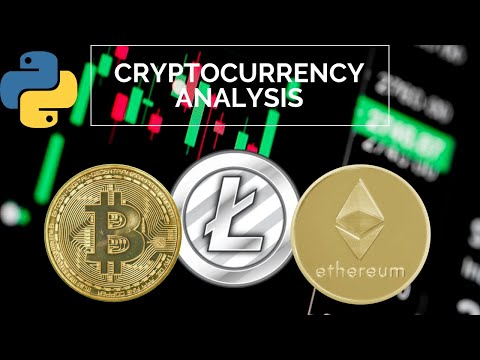

In [172]:
YouTubeVideo('j98smr5zsp8')

---  
### Librerias

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import YouTubeVideo

### Carga de Datasets  
Puede descargar los datsets [aqui](https://www.coindesk.com/price/litecoin)

In [224]:
btc = pd.read_csv('BTC_USD_2019-05-14_2020-05-13-CoinDesk.csv')
eth = pd.read_csv('ETH_USD_2019-05-14_2020-05-13-CoinDesk.csv')


In [267]:
ltc = pd.read_csv('LTC_USD_2019-05-14_2020-05-13-CoinDesk.csv')

In [225]:
print('Bitcoin')
btc.head(2)

Bitcoin


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-05-14,7928.417416,7906.946425,8353.869652,7642.403561
1,BTC,2019-05-15,8177.453519,7989.127708,8260.953110,7844.980238


In [226]:
print('ETH')
eth.head(2)

ETH


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2019-05-14,217.078132,197.299575,217.188013,193.310001
1,ETH,2019-05-15,246.826423,218.442133,247.095786,218.268092


In [227]:
print('LTC')
ltc.head(2)

LTC


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2019-05-14,90.170627,88.718978,94.388004,86.851903
1,LTC,2019-05-15,102.921952,91.579530,104.498293,90.922794


In [228]:
btc.shape, eth.shape, ltc.shape

((365, 6), (365, 6), (365, 6))

### Limmpieza de los DataFrame  
1. [x] seleccionar solo la columana de precio de cada df
1. [x] Renombrar las columnas de precio

In [229]:
#seleccionar columan de precio y renombrar columnas
columns = ['BTC']
btc = btc[['Closing Price (USD)']]
btc.columns = columns

In [230]:
btc.head(2)

,BTC
0,7928.417416
1,8177.453519


In [231]:
columns = ['ETH']
eth = eth[['Closing Price (USD)']]
eth.columns = columns
eth.head(2)

,ETH
0,217.078132
1,246.826423


In [268]:
columns = ['LTC']
ltc = ltc[['Closing Price (USD)']]
ltc.columns = columns
ltc.head(2)

,LTC
0,90.170627
1,102.921952


### Visualización

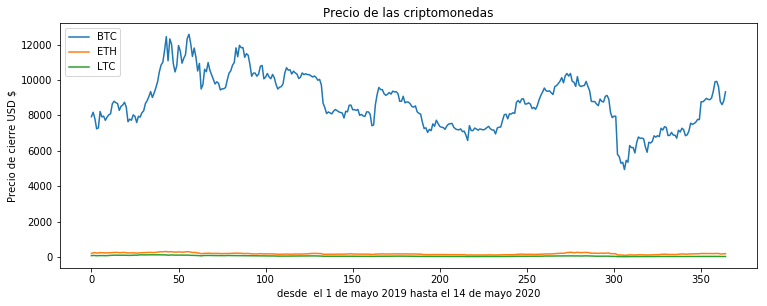

In [233]:
plt.figure(figsize= (12.5, 4.5))
plt.plot(btc.BTC, label ="BTC")
plt.plot(eth.ETH, label="ETH")
plt.plot(ltc.LTC, label="LTC")
plt.title('Precio de las criptomonedas')
plt.xlabel("desde  el 1 de mayo 2019 hasta el 14 de mayo 2020")
plt.ylabel('Precio de cierre USD $')
plt.legend(loc= 'upper left')
plt.show()

**<font color = red> El precio de las acciones del ETH y del LTC no tienen las mismas escalas de valores ya que el Bitcoin tiene un valor de cierre mayor lo podemos notar en la siguiete estadística basica"**

In [234]:
# crearemos un solo df
df = pd.concat([btc,eth, ltc], axis = 'columns')

In [235]:
df.describe()

,BTC,ETH,LTC
count,365.000000,365.000000,365.000000
mean,8759.870914,196.172798,68.389267
std,1481.575891,47.558593,26.898427
min,4944.702336,107.898345,32.053195
25%,7550.239200,163.937208,46.605055
50%,8688.973526,186.123827,60.036679
75%,9897.429352,224.238760,83.644499
max,12575.904067,324.130855,139.383189


**Nota:** Para poder gráficarlos y que tengan la misma escala, estandarizaremos los datos

### Estandarización delos datos

In [236]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,100))
scaled = minmax.fit_transform(df)

In [237]:
#convertir en DataFrame
df_scaled = pd.DataFrame(scaled, columns = df.columns)
df.head(2)

,BTC,ETH,LTC
0,7928.417416,217.078132,90.170627
1,8177.453519,246.826423,102.921952


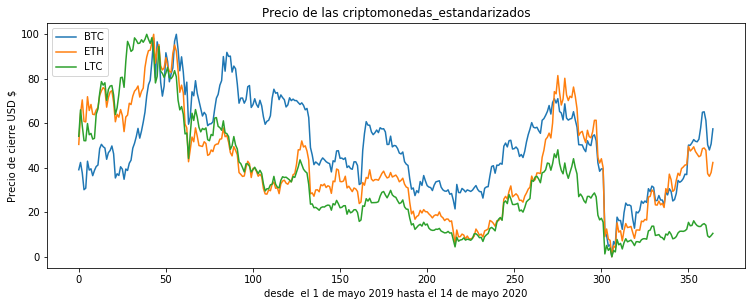

In [238]:
plt.figure(figsize= (12.5, 4.5))
plt.plot(df_scaled.BTC, label ="BTC")
plt.plot(df_scaled.ETH, label="ETH")
plt.plot(df_scaled.LTC, label="LTC")
plt.title('Precio de las criptomonedas_estandarizados')
plt.xlabel("desde  el 1 de mayo 2019 hasta el 14 de mayo 2020")
plt.ylabel('Precio de cierre USD $')
plt.legend(loc= 'upper left')
plt.show()

### Verificar la Volatividad

In [239]:
df_scaled.std()

BTC    19.414713
ETH    21.994192
LTC    25.061426
dtype: float64

### Verificar el promedio diario

In [240]:
df_scaled.mean()

BTC    49.994335
ETH    40.823858
LTC    33.854537
dtype: float64

### Correlación

In [241]:
df_scaled.corr()

,BTC,ETH,LTC
BTC,1.000000,0.678207,0.639697
ETH,0.678207,1.000000,0.869311
LTC,0.639697,0.869311,1.000000


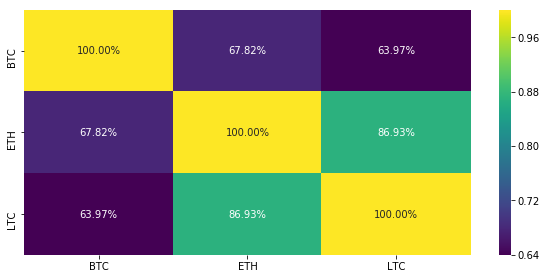

In [242]:
# visualización de la correlación de los datos
plt.figure(figsize=(10, 4.5))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2%', cmap= 'viridis')
plt.show()

### Análisis acumulativo de inversión

In [243]:
inv = (df_scaled+1).cumsum()

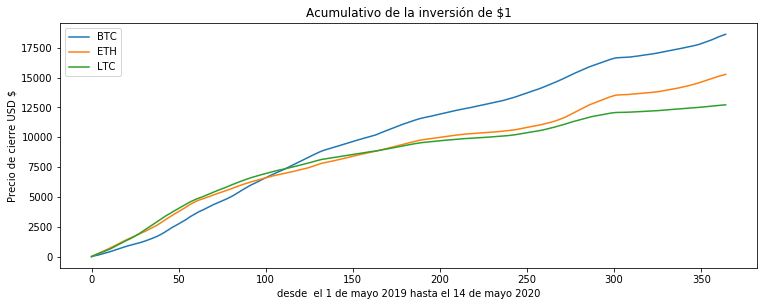

In [244]:
#visualización
plt.figure(figsize= (12.5, 4.5))
plt.plot(inv.BTC, label ="BTC")
plt.plot(inv.ETH, label="ETH")
plt.plot(inv.LTC, label="LTC")
plt.title('Acumulativo de la inversión de $1')
plt.xlabel("desde  el 1 de mayo 2019 hasta el 14 de mayo 2020")
plt.ylabel('Precio de cierre USD $')
plt.legend(loc= 'upper left')
plt.show()

### Predecir Precio del Bitcoin por los próximos 100 días

In [245]:
days_100 = 100
btc['predictions'] = btc[['BTC']].shift(-days_100)
btc.tail()

,BTC,predictions
360,9617.518195,NaN
361,8786.655182,NaN
362,8608.125245,NaN
363,8815.231245,NaN
364,9330.986485,NaN


### Crear variables (X,y)

In [246]:
#seleccion y remover los ultimos 100 dias
X = btc.drop('predictions', axis = 1).values
y = btc.predictions.values

#remover los ult 100 dias
X = X[: len(btc)-days_100]
y = y[:-days_100]
X.shape, y.shape

((265, 1), (265,))

### Dividir los datos en entrenamiento y test

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Modelo SVR

In [248]:
from sklearn.svm import SVR
svr= SVR(gamma='scale', C=1e3)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [249]:
y_pred = svr.predict(X_test)

In [250]:
#evaluación
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23035912845815287

In [251]:
# cear datos del BTC a predecir
btc_predecir = btc.drop('predictions',axis=1)[-days_100 : ].values
btc_predecir.shape

(100, 1)

In [252]:
days100_pred = svr.predict(btc_predecir)

In [253]:
df_btc_100days = btc.tail(days_100)
df_btc_100days['btc_predecir'] = btc_predecir
df_btc_100days.drop('predictions', axis= 1, inplace=True)
df_btc_100days.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BTC,btc_predecir
265,9177.894637,9177.894637
266,9625.456637,9625.456637
267,9681.377411,9681.377411
268,9795.344066,9795.344066
269,9927.778256,9927.778256
270,10132.706499,10132.706499
271,9838.900016,9838.900016
272,10236.635148,10236.635148
273,10364.926288,10364.926288
274,10218.099737,10218.099737


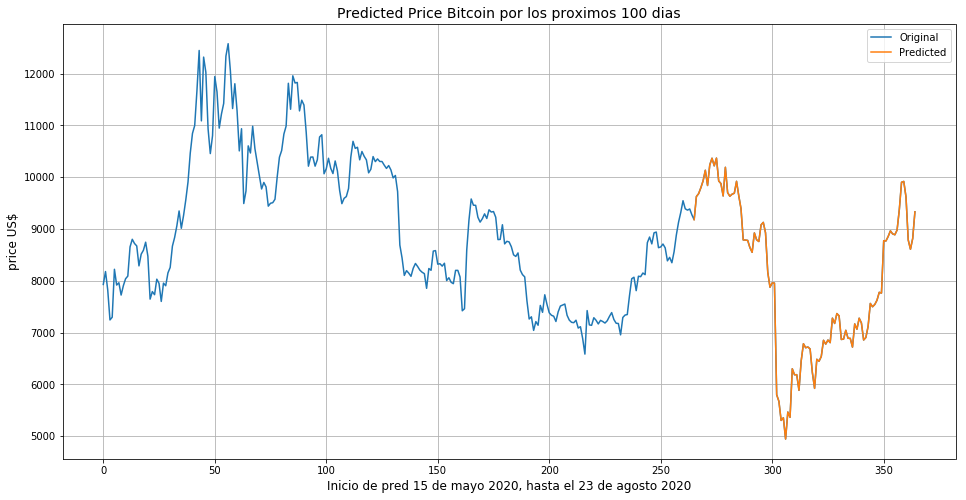

In [321]:
#plotear:
plt.figure(figsize = (16,8))
plt.title('Predicted Price Bitcoin por los proximos 100 dias', size = 14)
plt.xlabel("Inicio de pred 15 de mayo 2020, hasta el 23 de agosto 2020", size = 12)
plt.ylabel('price US$', size = 12)
plt.plot(btc.BTC, label = 'Original')
plt.plot(df_btc_100days.btc_predecir, label ='Predicted')
plt.legend( loc ='upper right')
plt.grid()
plt.show()

In [206]:
print('Precio min =', df_btc_100days.btc_predecir.min())
print('Precio max =', df_btc_100days.btc_predecir.max())

Precio min = 4944.7023359837
Precio max = 10367.5279981077


Como podemos observar el precio del Bitcoin tendran una bajada significativa a su precio mínimo será de **4,944.70**, luego ira en aumento hasta llegar a los **10,367.52**

### Predecir el precio del Litecoin (LTC)-para los próximos 100 días

In [269]:
ltc['predictions'] = ltc[['LTC']].shift(-days_100)
ltc.tail()

,LTC,predictions
360,47.208713,NaN
361,42.114981,NaN
362,41.396673,NaN
363,42.215764,NaN
364,43.311006,NaN


### Crear variables (X, y)

In [270]:
X = ltc.drop('predictions', axis='columns').values
y= ltc.predictions.values

# eliminar 100 días
X_lct = X[:len(ltc)-days_100]
y_ltc = y[:-days_100]
X_ltc.shape, y.shape

X_lct.shape, y_ltc.shape

((265, 1), (265,))

### Entenamiento y testeo de los datos

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_lct, y_ltc, test_size = 0.2, random_state = 42)

### Model 

In [272]:
srv_ltc= SVR(gamma='scale', C=1e3)
srv_ltc.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [273]:
#predecir con los datos de test y ver el score
y_pred = srv_ltc.predict(X_test)
r2_score(y_test, y_pred)

0.3336719257323032

In [274]:
#Predecir los 100 dias 
# cear datos del BTC a predecir
ltc_predecir = ltc.drop('predictions',axis=1)[-days_100 : ].values
ltc_predecir.shape

(100, 1)

In [275]:
ltc_pred = srv_ltc.predict(ltc_predecir)

In [276]:
ltc_resultados = ltc.tail(days_100)
ltc_resultados["prediccion_100days"] = ltc_pred
ltc_resultados.drop('predictions', axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [277]:
ltc_resultados.head(15)

,LTC,prediccion_100days
265,67.748030,44.377873
266,72.547785,42.692132
267,72.877989,42.750951
268,73.999082,43.113847
269,77.254954,45.419648
270,76.992068,45.175383
271,73.781746,43.024271
272,76.940291,45.128288
273,81.689809,50.398373
274,79.829581,48.173231


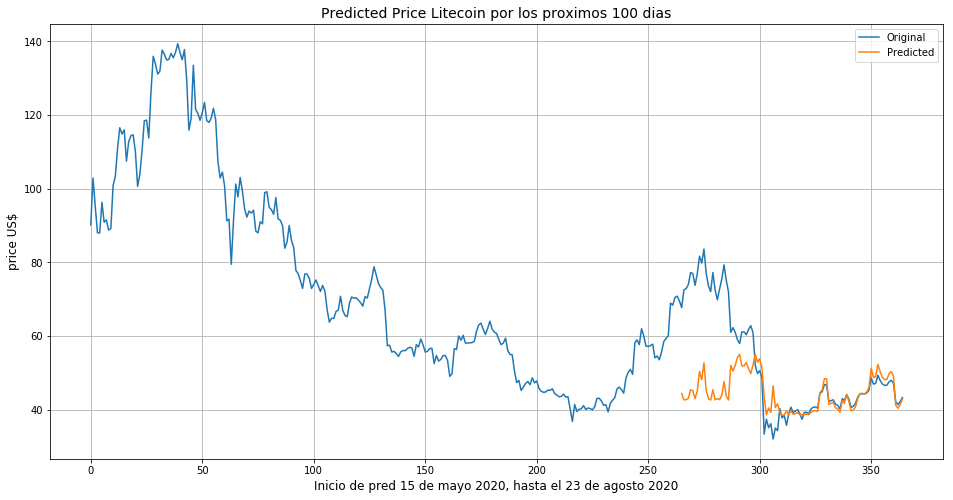

In [278]:
#plotear:
plt.figure(figsize = (16,8))
plt.title('Predicted Price Litecoin por los proximos 100 dias', size = 14)
plt.xlabel("Inicio de pred 15 de mayo 2020, hasta el 23 de agosto 2020", size = 12)
plt.ylabel('price US$', size = 12)
plt.plot(ltc.LTC, label = 'Original')
plt.plot(ltc_resultados.prediccion_100days, label ='Predicted')
plt.legend( loc ='upper right')
plt.grid()
plt.show()

In [263]:
print('Precio Mínimo_predicted ='  ,ltc_resultados.prediccion_100days.min())
print('Precio Maxímo_predicted ='  ,ltc_resultados.prediccion_100days.max())

Precio Mínimo_predicted = 38.56674654096875
Precio Maxímo_predicted = 55.18223142560885


In [279]:
print('Precio Mínimo_original ='  ,ltc.LTC.min())
print('Precio Maxímo_original ='  ,ltc.LTC.max())

Precio Mínimo_original = 32.0531945034
Precio Maxímo_original = 139.3831894153


In [280]:
comparacion_precios_max = ltc_resultados.prediccion_100days.max() - ltc.LTC.max()
comparacion_precios_max

-84.20095798969115

In [282]:
comparacion_precios_max/ ltc.LTC.max()

-0.6040969383962774

### Resultado de la predicción para el Litecoin  

El precio de está criptomoneda tendra una tendencia a la baja para los proxímos 100 días, podemos ver en este período de predicción su maxímo precio será de **55.18**, comprado con su precio máximo original estaría de **139.38**, estaría en un **-84.20** dolares menos, esto representa que alcanzaria un precio maxímo de un **60% menos**.

### Poryección del Ethereum (ETH)

In [345]:
ETH = pd.read_csv('ETH_USD_2019-05-14_2020-05-13-CoinDesk.csv',  parse_dates =['Date'], index_col = 'Date')
ETH.head(2)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2019-05-14,ETH,217.078132,197.299575,217.188013,193.310001
2019-05-15,ETH,246.826423,218.442133,247.095786,218.268092


In [315]:
#ultimos 5 registros
ETH.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2020-05-09,ETH,211.372735,213.620015,215.333610,209.164794
2020-05-10,ETH,188.644661,211.365622,212.111205,180.848171
2020-05-11,ETH,186.014775,187.754143,193.720207,176.492906
2020-05-12,ETH,189.818187,186.005549,192.345112,183.969672
2020-05-13,ETH,199.471248,190.045162,201.287101,188.704258


In [346]:
df = ETH[['Closing Price (USD)']]
df.head()

,Closing Price (USD)
Date,
2019-05-14,217.078132
2019-05-15,246.826423
2019-05-16,260.330209
2019-05-17,239.449265
2019-05-18,238.931991


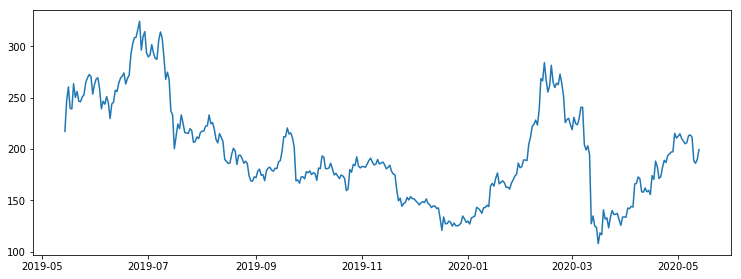

In [348]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df)
plt.show()

In [349]:
days = 100
df['predictions'] = df['Closing Price (USD)'].shift(-days)
df.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Closing Price (USD),predictions
Date,,
2020-05-09,211.372735,NaN
2020-05-10,188.644661,NaN
2020-05-11,186.014775,NaN
2020-05-12,189.818187,NaN
2020-05-13,199.471248,NaN


### Feature and response(X,y)

In [350]:
X = df.drop('predictions', axis = 1).values
y = df.predictions.values

#Reliminar los ult 100 registros
X = X[:len(df)-days]
y= y[:-days]

X.shape, y.shape

((265, 1), (265,))

### Data de entrenamiento y Prueba

In [327]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

### Modelo y pred

In [351]:
eth_svr = SVR(gamma='scale', C=1e3)
eth_svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [352]:
y_pred = eth_svr.predict(X_test)
r2_score(y_test, y_pred)

0.060138735221115236

In [353]:
#datos a predecir
eth_predecir = df.drop('predictions',axis=1)[-days_100 : ].values
eth_predecir.shape

(100, 1)

In [354]:
prediccion = eth_svr.predict(eth_predecir)

In [359]:
df = df.drop('predictions', axis =1)
df = df.tail(days)
df['predicted'] = prediccion
df.head(15)

,Closing Price (USD),predicted
Date,,
2020-02-04,188.675082,166.236398
2020-02-05,204.530535,172.982086
2020-02-06,211.292487,178.827747
2020-02-07,221.833139,186.275980
2020-02-08,224.029427,187.181608
2020-02-09,228.044309,188.106886
2020-02-10,223.319638,186.919062
2020-02-11,237.878345,186.629904
2020-02-12,268.396268,177.890623


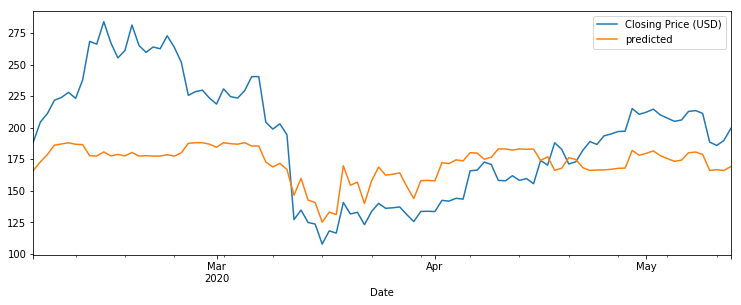

In [362]:
df.plot(figsize=(12.5,4.5))